In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [3]:


# Number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])



Number of rows: 148654
Number of columns: 13


In [4]:
# Data types of each column
print("Data types:")
print(df.dtypes)




Data types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
# Missing values in each column
print("Missing values:")
print(df.isnull().sum())

Missing values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [6]:
# Calculate basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]  # Mode can have multiple values, so we select the first one
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()

# Display the results
print("Mean salary:", mean_salary)
print("Median salary:", median_salary)
print("Mode salary:", mode_salary)
print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)
print("Salary range:", salary_range)
print("Standard deviation of salary:", std_dev_salary)


Mean salary: 74768.32197169267
Median salary: 71426.60999999999
Mode salary: 0.0
Minimum salary: -618.13
Maximum salary: 567595.43
Salary range: 568213.56
Standard deviation of salary: 50517.00527394987


Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [7]:
# Impute missing values with the mean salary
mean_salary = df['TotalPay'].mean()
df['TotalPay'].fillna(mean_salary, inplace=True)

Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments

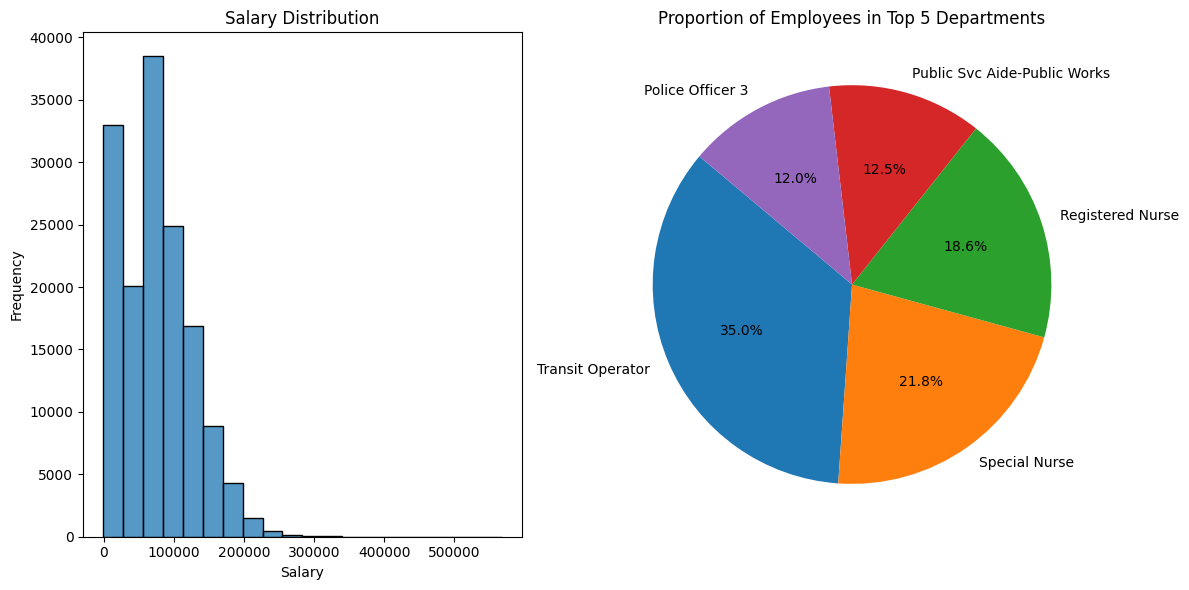

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for salary distribution
sns.histplot(df['TotalPay'], bins=20, ax=axs[0])
axs[0].set_title('Salary Distribution')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Frequency')

# Plot pie chart for department proportions
department_counts = df['JobTitle'].value_counts()
top_departments = department_counts.head(5)  # Considering top 5 departments for better visualization
axs[1].pie(top_departments, labels=top_departments.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Proportion of Employees in Top 5 Departments')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[1].axis('equal')

# Show the plots
plt.tight_layout()
plt.show()


 **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.



In [9]:
# Group the data by department and calculate summary statistics for each group
department_stats = df.groupby('JobTitle')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max'])
department_stats.reset_index(inplace=True)  # Resetting index to make 'JobTitle' a column again

# Sort the departments by average salary (mean)
department_stats_sorted = department_stats.sort_values(by='mean', ascending=False)

# Display the summary statistics
print("Summary Statistics for Different Departments:")
print(department_stats_sorted)



Summary Statistics for Different Departments:
                                            JobTitle  count           mean  \
831   GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY      2  399211.275000   
466                         Chief Investment Officer      1  339653.700000   
474                                  Chief of Police      3  329183.646667   
475                           Chief, Fire Department      3  325971.683333   
586                   DEPUTY DIRECTOR OF INVESTMENTS      1  307899.460000   
...                                              ...    ...            ...   
499                     Commissioner 16.700c, No Pay     50      25.760000   
975                          IS Technician Assistant      1       0.000000   
1274                                    Not provided      4       0.000000   
1538                         Public Safety Comm Tech      1       0.000000   
661                           Drug Court Coordinator      1       0.000000   

          median 

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


Correlation between TotalPay and BasePay: 0.9544936474296023


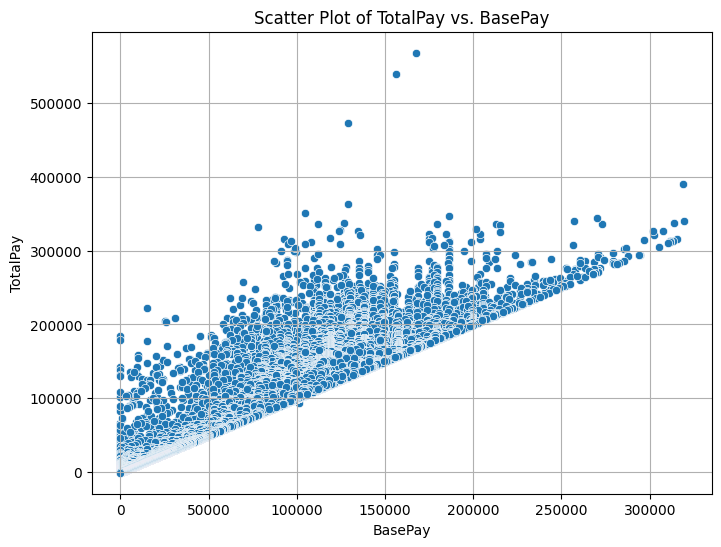

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'BasePay' is another numerical column to be correlated with 'TotalPay'
# If you have another numerical column, replace 'BasePay' with the actual column name
# Calculate the correlation coefficient
correlation = df['TotalPay'].corr(df['BasePay'])
print("Correlation between TotalPay and BasePay:", correlation)

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='BasePay', y='TotalPay')
plt.title('Scatter Plot of TotalPay vs. BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()


6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


Correlation between TotalPay and OtherPay: 0.47049590107841593


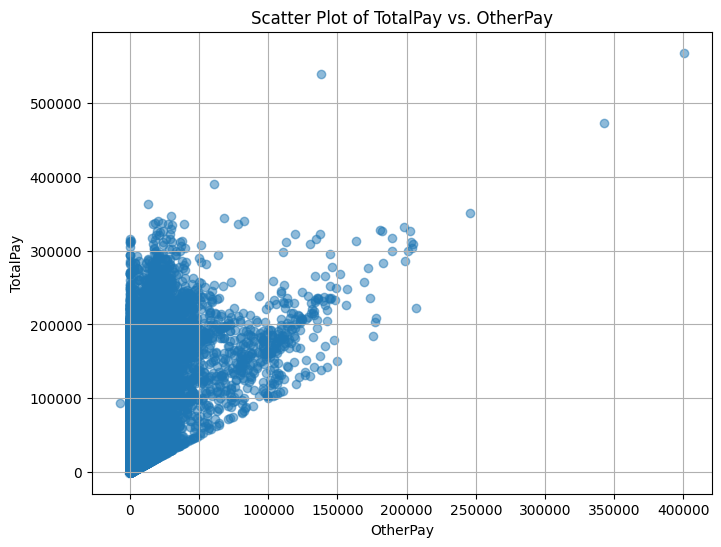

In [12]:


# Calculate the correlation coefficient
correlation = df['TotalPay'].corr(df['OtherPay'])
print("Correlation between TotalPay and OtherPay:", correlation)

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['OtherPay'], df['TotalPay'], alpha=0.5)
plt.title('Scatter Plot of TotalPay vs. OtherPay')
plt.xlabel('OtherPay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()
